## Ford Fulkerson algorithm for Maximum Flow Problem Example

The Ford-Fulkerson algorithm is a classic algorithm used to compute the maximum flow in a flow network. The maximum flow problem involves finding the greatest amount of flow that can go from a source node to a sink node without exceeding the capacities of the edges in the network. The algorithm is commonly used in various applications, such as network routing, circulation, matching problems, and more.

### Steps of the algorithm

**Initialization:** Start with zero flow in the network.

**Path Search:** Find an augmenting path from the source node S to the sink node T in the residual graph. An augmenting path is a path where the residual capacity (original capacity minus current flow) of all the edges is greater than zero.

**Augment Flow:** Increase the flow along the found path with the minimum residual capacity of any edge in the path (also known as the bottleneck capacity).

**Update Residual Graph:** After augmenting the flow, update the residual capacities of the edges along the path. If the flow in an edge becomes equal to its capacity, remove the edge from the residual graph. Add a reverse edge in the residual graph with a capacity equal to the flow if it doesn't already exist.

**Repeat:** Repeat the path search and flow augmentation steps until no augmenting path can be found in the residual graph.

**Termination:** When no more augmenting paths exist, the algorithm terminates. The flow value at this point is the maximum flow from S to T.

### Solving an example by hand

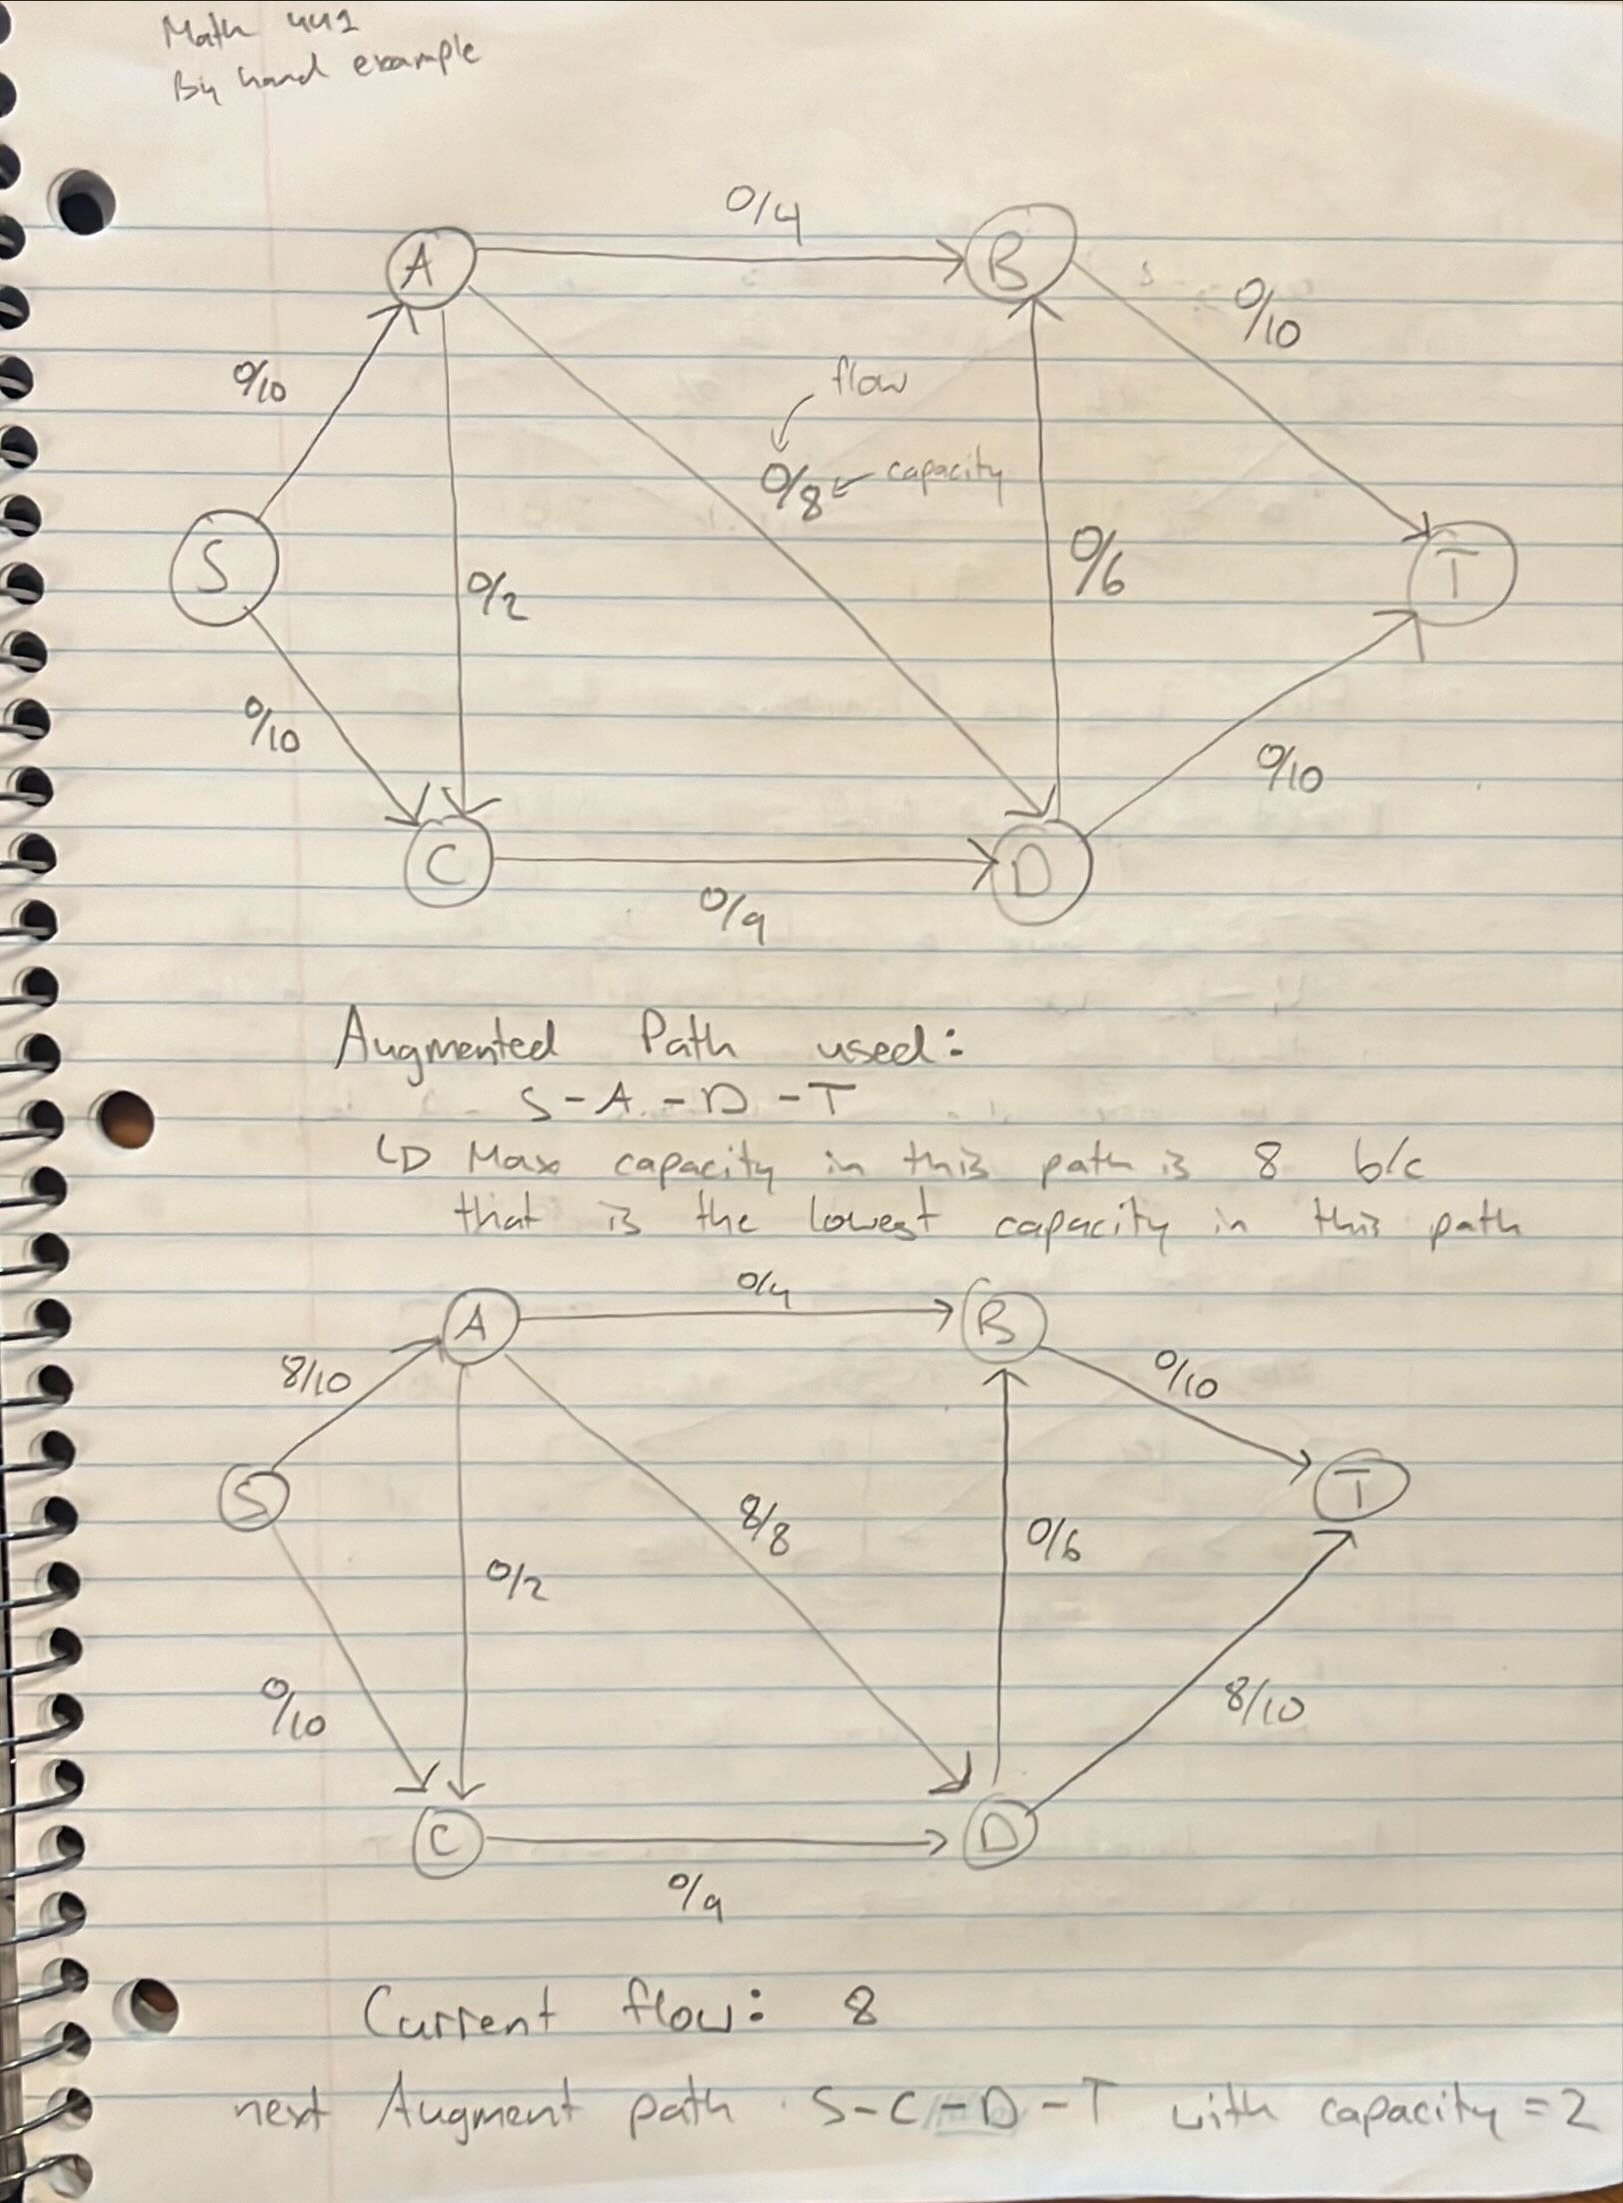

In [1]:
from IPython.display import Image

Image(filename='Data/Flow_Tree_1.jpeg')

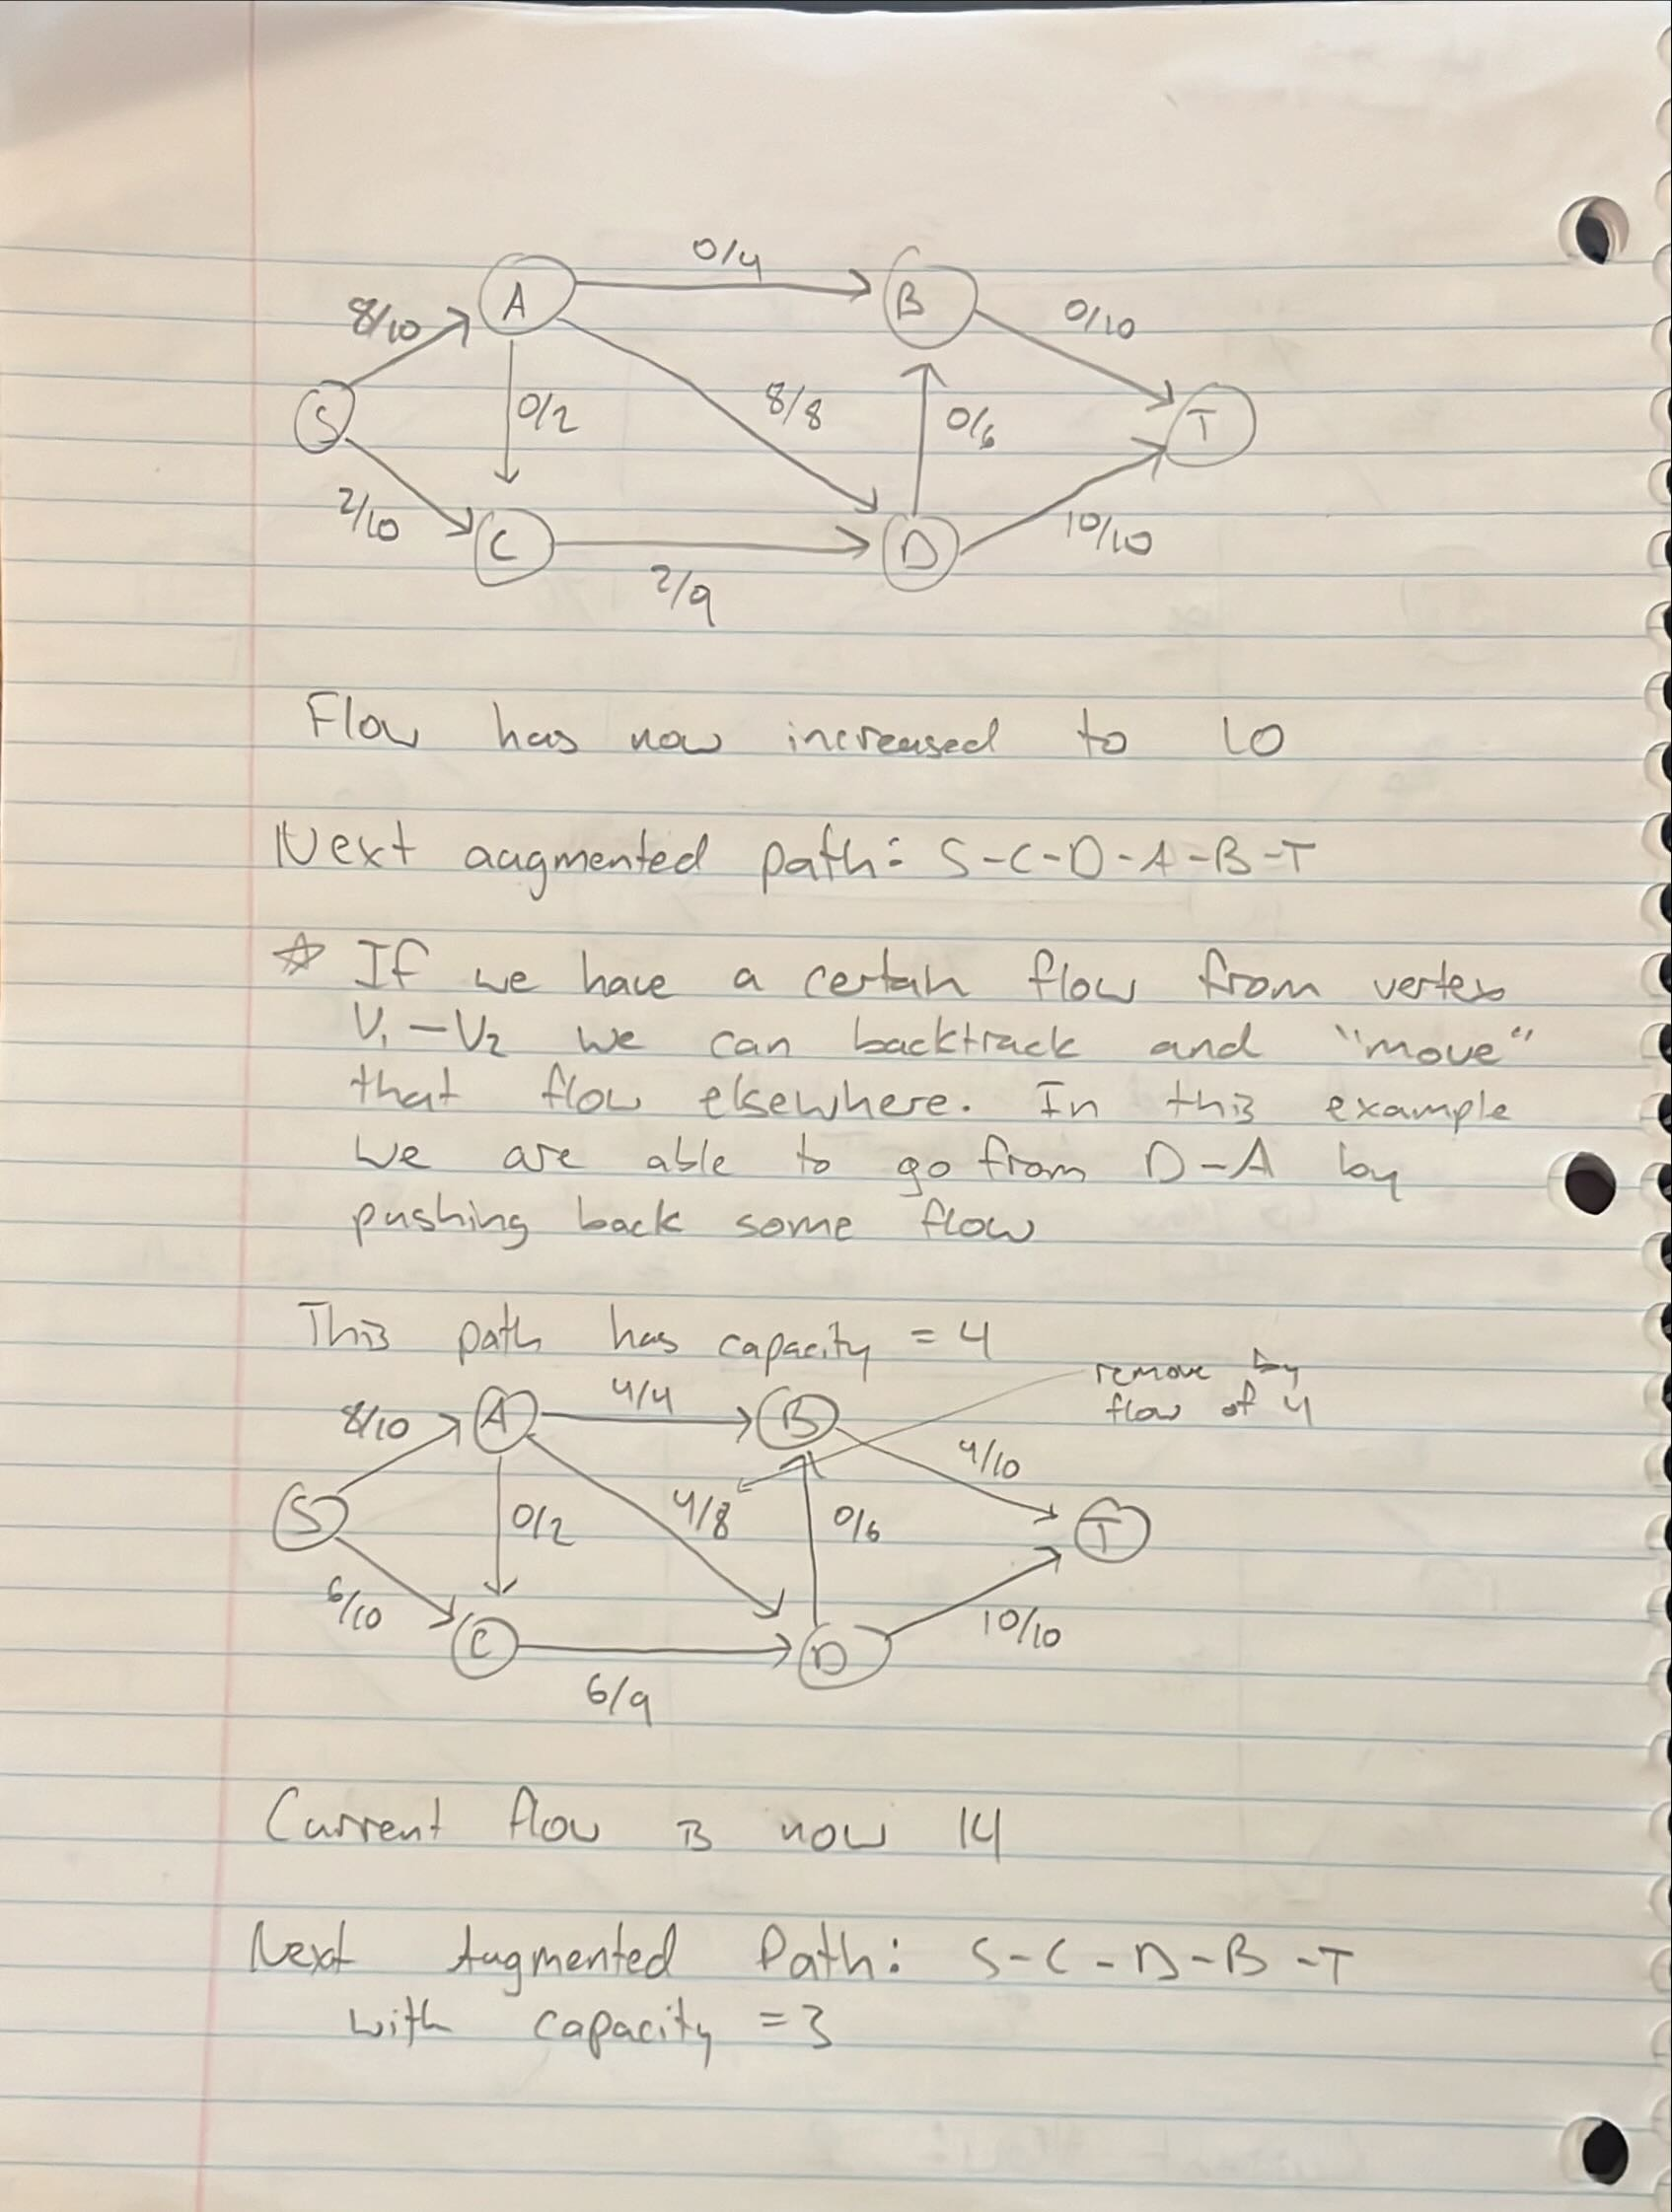

In [2]:
from IPython.display import Image

Image(filename='Data/Flow_Tree_2.jpeg')

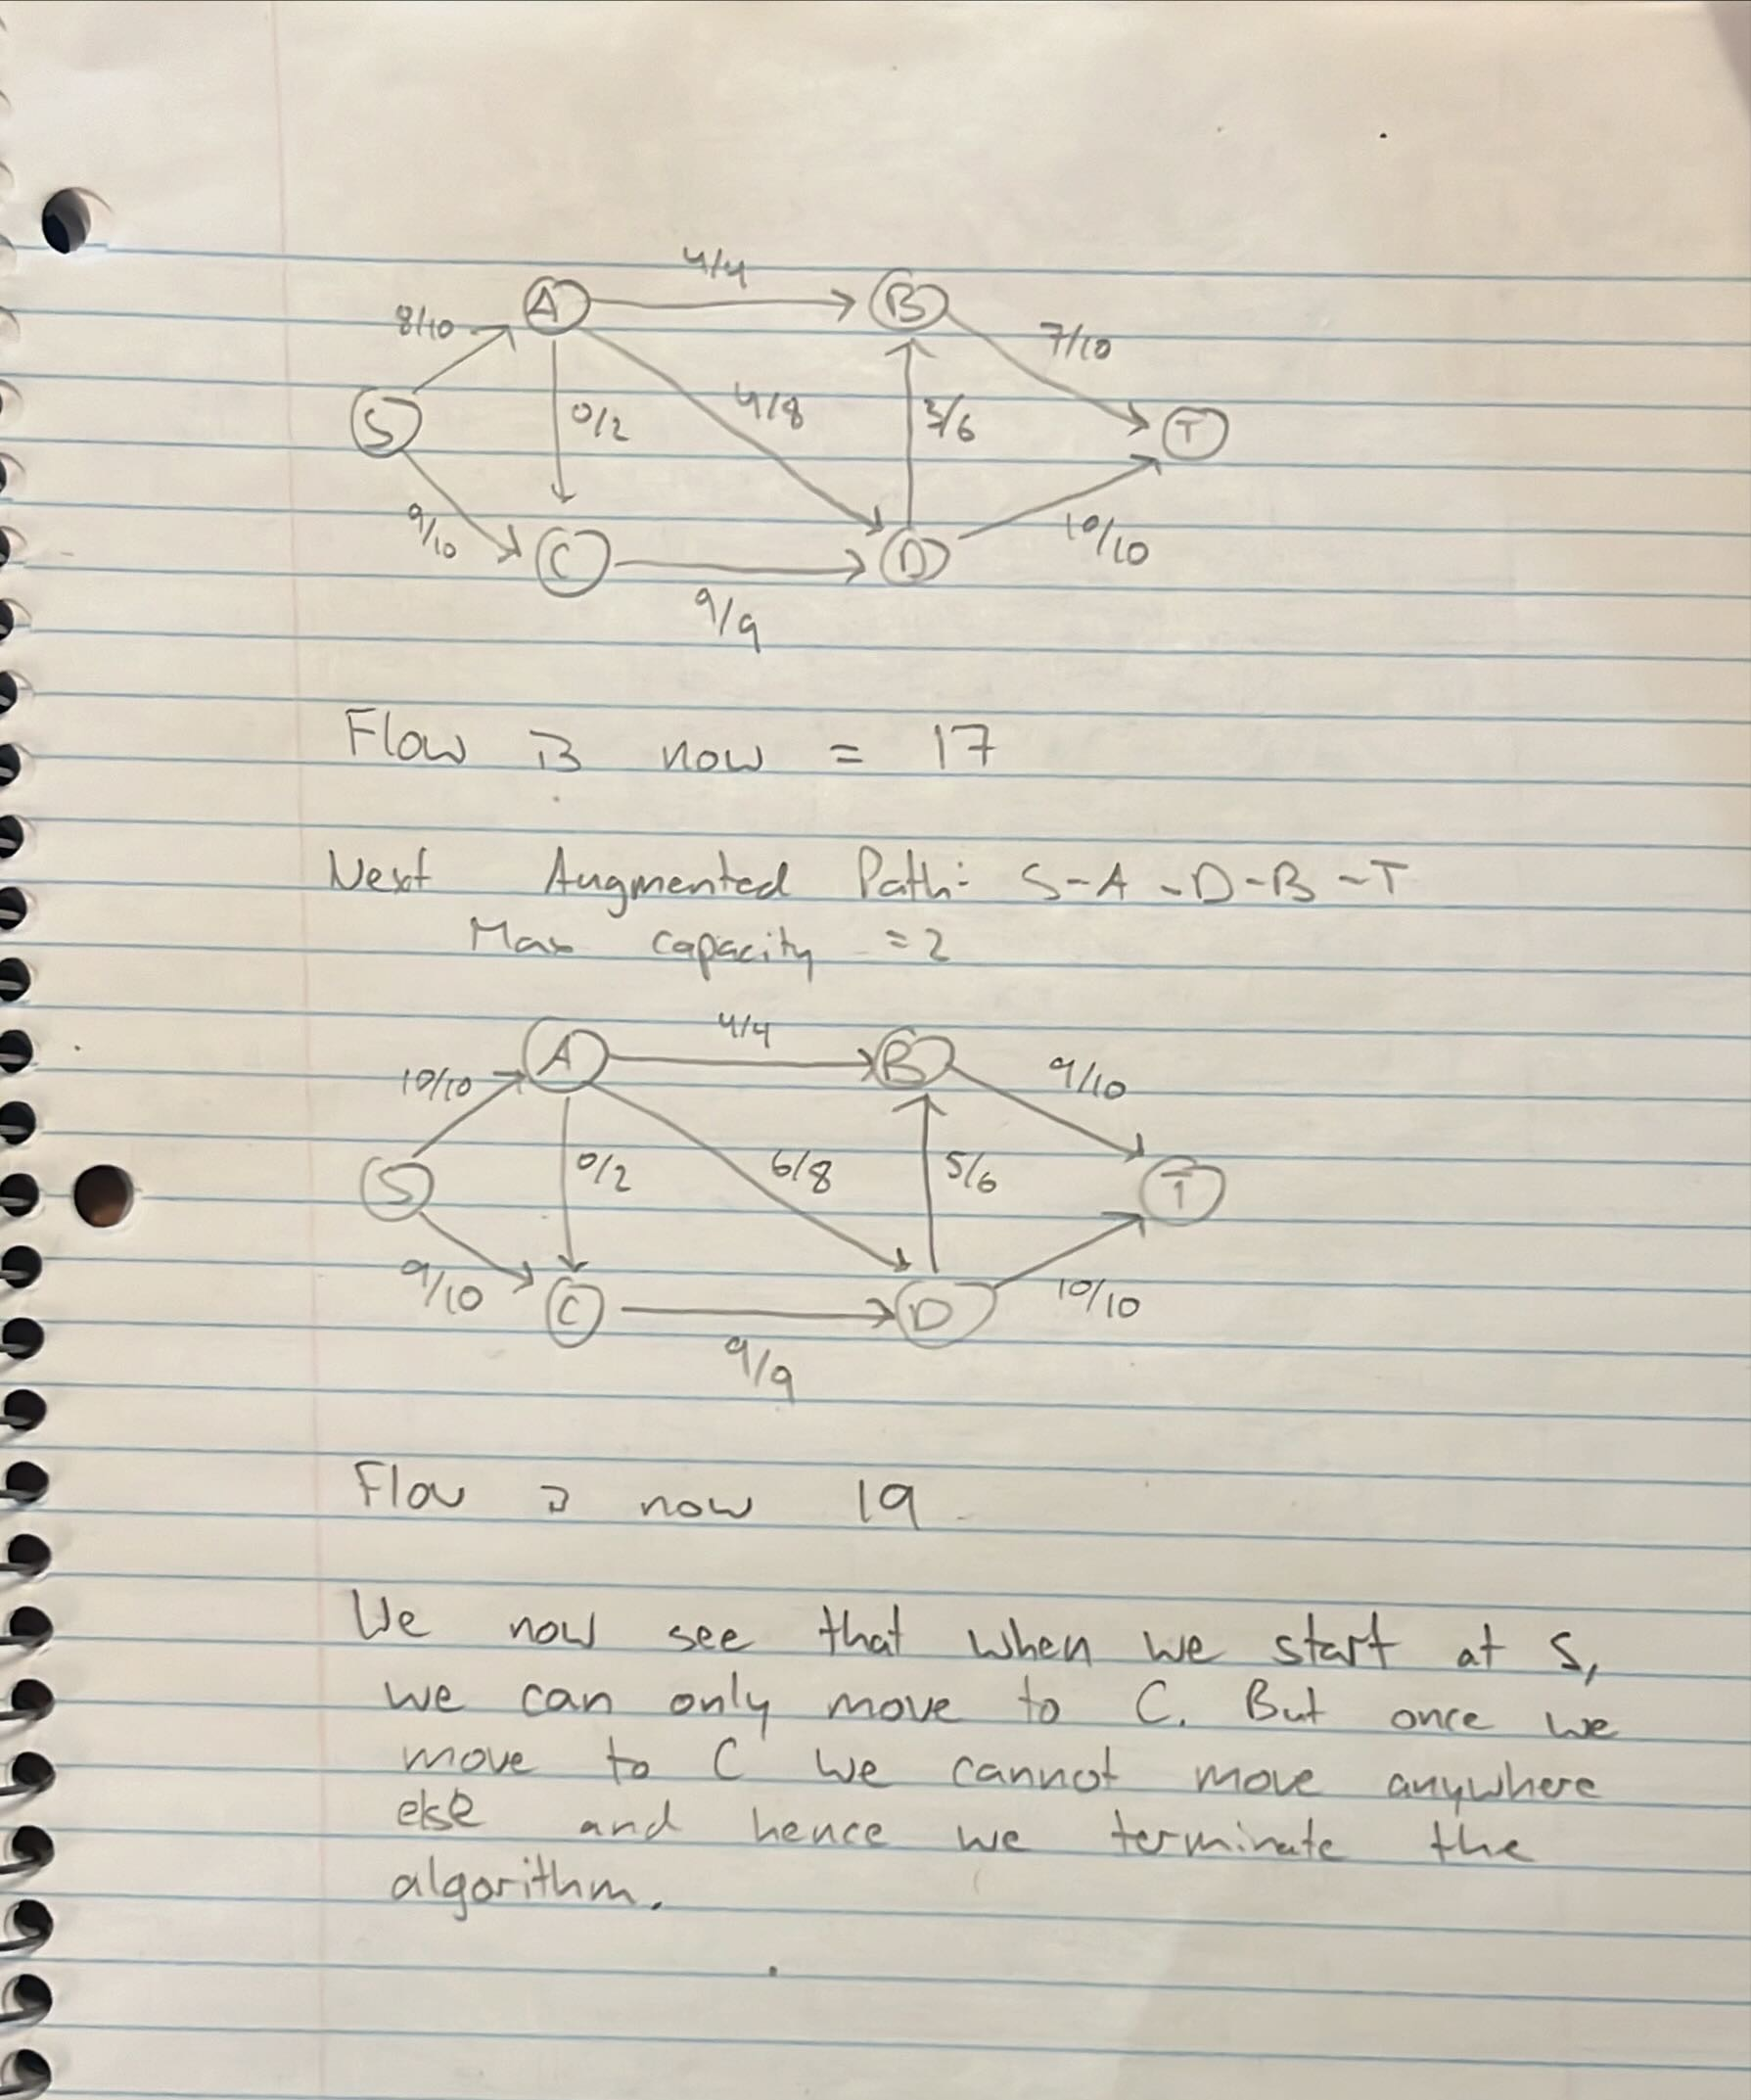

In [3]:
from IPython.display import Image

Image(filename='Data/Flow_Tree_3.jpeg')

The Ford-Fulkerson algorithm works based on two key principles in flow networks: conservation of flow and augmenting paths. 

**Conservation of Flow:** The algorithm maintains flow conservation at every node except the source and sink. What flows into a node must flow out, which is a fundamental property of flow networks.

**Augmenting Paths:** The algorithm progressively finds augmenting paths, which are paths from the source to the sink with available capacity. By sending additional flow along these paths, it incrementally increases the overall flow.

**Bottleneck Capacity:** On each augmenting path, the algorithm identifies the edge with the smallest residual capacity (the bottleneck) and increases the flow by this amount. This ensures that we are sending as much flow as possible without violating capacity constraints.

**Termination Condition:** The algorithm continues to find and augment paths until no more augmenting paths are available. At this stage, it is guaranteed that the flow cannot be increased any further without exceeding the capacities, implying that the maximum flow has been achieved.

**Cut-Flow Duality:** The Ford-Fulkerson algorithm is underpinned by the max-flow min-cut theorem, which states that the maximum flow from a source to a sink is equal to the minimum cut capacity separating the source from the sink. When the algorithm terminates, it indirectly confirms that the flow is maximal because any cut of the network would have a flow equal to its capacity.

**No Wasted Flow:** The algorithm never wastes flow. If flow is sent along a path, and later it is found to be non-optimal, the algorithm can 're-route' it through reverse edges in the residual graph. This way, it adjusts previous flows to keep improving the total flow.

In [15]:
from collections import defaultdict

class Graph:
    def __init__(self, graph):
        self.graph = graph  # residual graph
        self.ROW = len(graph)

    # Using DFS to find an augmenting path
    def _dfs(self, s, t, parent):
        visited = [False] * self.ROW
        stack = [s]
        visited[s] = True

        while stack:
            u = stack.pop()

            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:  # Check if the node is visited and has a capacity left
                    stack.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True
        return False

    # Returns tne maximum flow from s to t in the given graph
    def ford_fulkerson(self, source, sink):
        parent = [-1] * self.ROW
        max_flow = 0  # There is no flow initially

        # Augment the flow while there is path from source to sink
        while self._dfs(source, sink, parent):
            path_flow = float('Inf')
            s = sink
            while s != source:
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # update residual capacities of the edges and reverse edges along the path
            v = sink
            while v != source:
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

            max_flow += path_flow

        return max_flow

# Example to use the above code
graph = [
    [0, 10, 0, 10, 0, 0],
    [0, 0, 4, 2, 8, 0],
    [0, 0, 0, 0, 0, 10],
    [0, 0, 0, 0, 9, 0],
    [0, 0, 6, 0, 0, 10],
    [0, 0, 0, 0, 0, 0]
]

g = Graph(graph)

source = 0
sink = 5
print("The maximum possible flow is %d " % g.ford_fulkerson(source, sink))


The maximum possible flow is 19 


### Confirming results with networkx

In [22]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges along with their capacities
G.add_edge('S', 'A', capacity=10)
G.add_edge('S', 'C', capacity=10)
G.add_edge('A', 'B', capacity=4)
G.add_edge('A', 'C', capacity=2)
G.add_edge('A', 'D', capacity=8)
G.add_edge('C', 'D', capacity=9)
G.add_edge('D', 'B', capacity=6)
G.add_edge('B', 'T', capacity=10)
G.add_edge('D', 'T', capacity=10)

# Compute the maximum flow between source 'A' and sink 'F'
flow_value, flow_dict = nx.maximum_flow(G, 'S', 'T')

print("The maximum possible flow is", flow_value)
print("The flow for each edge is:")
for u, flows in flow_dict.items():
    for v, flow in flows.items():
        if flow > 0:
            print(f"Flow from {u} to {v}: {flow}")


The maximum possible flow is 19
The flow for each edge is:
Flow from S to A: 10
Flow from S to C: 9
Flow from A to B: 4
Flow from A to D: 6
Flow from C to D: 9
Flow from B to T: 9
Flow from D to B: 5
Flow from D to T: 10
